# Sentiment Analysis Of Youtube Comments

<H3>Importing python packages</H3>

In [1]:
#Data processing packages
import pandas as pd
import numpy as np
import os
import json
import string
import nltk
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

# NLP packages
from pycorenlp import StanfordCoreNLP
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()


In [2]:
# define coment dictionaries list
comment_data = []


# define directory path
DIR_PATH = "./Comments/"

In [3]:
# go over all files in the dir
for file_name in os.listdir(DIR_PATH):
    print(file_name)
    # check if the file is a json comment file
    if file_name.endswith('comments.json'):
        print("hello")
        # get the entire path of the file
        json_file_path = os.path.join(DIR_PATH, file_name)
        
        # open the json file
        with open (json_file_path, "r") as f:
            
            # load file to dict
            json_data = json.load(f)
        
        # go over the comments 
        for comment in json_data:

            # slice comment meta data
            comment_meta = {
                "comment_id" : comment.get('id'), 
                "comment" : comment.get('commentText'),
                "user_id" : comment.get('author').get('id'),
                "video_id" : file_name[:-14]
            }
            
            # append the data to the final list
            comment_data.append(comment_meta)

Mya3ZvVRTRg-meta.json
zhhxK83hWzU-meta.json
b6-qoXEYY10-meta.json
6bLG0GcCYik-meta.json
ddDvm7C1RMo-meta.json
yjrmjarfzmI-meta.json
XQ6vX6nmboU-meta.json
pdUKug8XahU-comments.json
hello
nGplsMkStVM-comments.json
hello
GGt4yJL09IU-comments.json
hello
3PtbK_0j1sw-comments.json
hello
0FnX1ufiMzM-meta.json
UdQxMux_cu0-comments.json
hello
emHyQNfQKaw-comments.json
hello
MnQXRfCo7aU-meta.json
pX56Sj4XzGM-meta.json
5kFEg2fRxA4-comments.json
hello
WBAzdNdCVxw-comments.json
hello
3iLT6iDu8Ds-meta.json
e2ZanubcQjE-meta.json
e_r_qNy7bno-comments.json
hello
v2-ytP-HllE-comments.json
hello
S5-12O3kiho-meta.json
5H6d4MA-6X8-comments.json
hello
8DULIfYDyBo-comments.json
hello
HbNYuOTaYFs-meta.json
pjdcUqJNk5c-meta.json
p-W5W_KIsUw-meta.json
g6QZcvqyE-Y-meta.json
XnFh3s74Dxg-meta.json
XDtTvAkKT4g-meta.json
pAEVLUeYaf8-comments.json
hello
XFQ4La8te1M-comments.json
hello
6ysFDaHpMfg-comments.json
hello
-XHPGGE8-Uo-meta.json
bMOtP68xR6g-comments.json
hello
CBZHavTlT6w-meta.json
ENJwA9MVHz8-meta.json
Z2vl

rfYydagxcJI-meta.json
Yk1CGk0TZAw-meta.json
-XHPGGE8-Uo-comments.json
hello
a59U6kRJHLg-comments.json
hello
U7HxYOaFr88-comments.json
hello
wQBtzNCuCAA-meta.json
XhEOpqwZeNQ-comments.json
hello
1ZdO8jT5TaY-comments.json
hello
Ymnv_h4763A-comments.json
hello
UULEkS-oOaE-meta.json
fJATz_Mu2Wg-comments.json
hello
A7hgf-RfHyc-meta.json
ktoZIF3AN9E-comments.json
hello
al_5-BDDFPs-meta.json
TvXBl063ixk-comments.json
hello
BSMOp8nBKes-comments.json
hello
6bLG0GcCYik-comments.json
hello
UQaHNS7oCWY-meta.json
I4SgcraOAOU-comments.json
hello
PDdNGsqi1Ho-meta.json
ADEh9F0Lidc-comments.json
hello
2rCKUcaS198-meta.json
ZPNgL1Ss7fU-comments.json
hello
BruI_wB2PSE-comments.json
hello
l2qgTyTVUgI-comments.json
hello
S0S6kni_Ff0-comments.json
hello
fsGEkCw_B70-comments.json
hello
tIqlu4sm5OQ-meta.json
xeUlGnNUut8-comments.json
hello
CQtpiBqVQyY-meta.json
l3daDnnz-2o-comments.json
hello
ZZDUJeUhX9c-meta.json
85_fSnZ6NUM-meta.json
HQgZh-eGESw-comments.json
hello
iTZlYpaOZfw-comments.json
hello
_o-D-bgXAK

f-iD0YrkFfI-comments.json
hello
UKEVljWNaA8-meta.json
i0k3JPFtw60-meta.json
EnhtpjbNHWY-meta.json
YcPm16U55sE-meta.json
EavSblb031o-meta.json
j3T_imAj6uI-meta.json
HEZqanWT27w-meta.json
ZZDUJeUhX9c-comments.json
hello
gE92XtxCnyg-meta.json
pcbfAuehGsc-comments.json
hello
Ymnv_h4763A-meta.json
mTS7juj9N1E-comments.json
hello
WKN9nvXTGHE-meta.json
25eFzFXcdyA-meta.json
TQ8SpKaXkWg-meta.json
5Ay1RLg9_Pk-comments.json
hello
iTZlYpaOZfw-meta.json
YVpQ4xV_VB0-comments.json
hello
uH0UQl5JC2c-meta.json
otHviixLykI-meta.json
ujws3_SLMPk-meta.json
IsgNhhlIUrU-meta.json
qTO7959ySss-meta.json
pJqbhRRZx8w-comments.json
hello
sMib1nMCdfc-comments.json
hello
DFjKYBa6ZqU-meta.json
0QylvO0d48s-meta.json
-hSOuK7qBgM-meta.json
wn8SpOoY_aw-meta.json
i_HzXNRI1DE-comments.json
hello
3mQh7mFgeBc-comments.json
hello
W3VDcUP60sE-meta.json
No5RbW1A2Ss-comments.json
hello
WbGaqJehEHw-comments.json
hello
ZRmRamdNFHg-meta.json
OCWRdrpQ83w-meta.json
5GhCaAkWuSo-meta.json
nPFYvVuqZLI-comments.json
hello
C-gwT7sI8SU-

GJLlxj_dtq8-comments.json
hello
lvsPxoldsic-meta.json
GWRwuilpbGw-meta.json
ULd_sxplvf4-meta.json
lojuls2PmYs-meta.json
0xT_2jfVaII-meta.json
oMN7ycsXfCo-meta.json
7yjea4JxBX8-meta.json
DU3OcUvivyo-comments.json
hello
oMN7ycsXfCo-comments.json
hello
QY7lHH521SE-comments.json
hello
GJLlxj_dtq8-meta.json
NLsDn59fxdQ-meta.json
DAxSM8yPs1k-meta.json
EavSblb031o-comments.json
hello
RARKNr6ru-c-comments.json
hello
vyNrgSue3E4-comments.json
hello
tSRfYteappo-meta.json
ElRn6AX9IBs-comments.json
hello
DDZW6ZUESzg-meta.json
xniDjNQtqyg-comments.json
hello
PpGk15i6eTc-meta.json
v5PEXWv--G8-meta.json
qxwMlYMMSnI-meta.json
yjrmjarfzmI-comments.json
hello
niExdgR14Gk-meta.json
ZQFn1Z-x9DQ-meta.json
NLyZHFTNGfw-comments.json
hello
al_5-BDDFPs-comments.json
hello
_ze5p_hG6wY-comments.json
hello
ImO-vBmL4gk-comments.json
hello
ujws3_SLMPk-comments.json
hello
i0k3JPFtw60-comments.json
hello
jW0a3UikQqk-meta.json
6TcoAnk_Q-c-meta.json
qhQzCayvfZ8-comments.json
hello
2SfSUjxNHtE-meta.json
cHxOBS97fDU-comm

In [4]:
comment_data

[{'comment_id': 'Ugxbw2WD-hchkWCrmt54AaABAg',
  'comment': 'I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops',
  'user_id': 'UCIF8DkwMeRUtWq9wSvMqBgw',
  'video_id': 'pdUKug8XahU'},
 {'comment_id': 'Ugzy0AbwK8hjbnvV-5Z4AaABAg',
  'comment': 'I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today  but with some games that Nvidia thinks it can run at max settings it can&#39;t when the fans pick up and go nuts. I do have my laptop set up so it can have airflow under it and it still gets very hot but that&#39;s how most gaming laptops are in my experience.',
  'user_id': 'UC2JijchTVFQdbrhIT8njcMg',
  'video_id': 'pdUKug8XahU'},
 {'comment_id': 'UgyY3jPwgpT1oGi7kvJ4AaABAg',
  'comment': '1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years',
  'user_id': 'UC8sm6uSupqoaPPy4b_JD3IQ',
  'video_id': 'pdUKug8XahU'},
 {'comment_id': 'UgxhZOz5QLpGsDOWiip4AaABA

In [5]:
# create the dataframe 
comments_df = pd.DataFrame(comment_data)
comment_textblob = pd.DataFrame(comment_data)
comment_stanfordnlp = pd.DataFrame(comment_data)

In [6]:
# show first five rows
comments_df.head()

,comment_id,comment,user_id,video_id
0,Ugxbw2WD-hchkWCrmt54AaABAg,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops,UCIF8DkwMeRUtWq9wSvMqBgw,pdUKug8XahU
1,Ugzy0AbwK8hjbnvV-5Z4AaABAg,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...,UC2JijchTVFQdbrhIT8njcMg,pdUKug8XahU
2,UgyY3jPwgpT1oGi7kvJ4AaABAg,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years,UC8sm6uSupqoaPPy4b_JD3IQ,pdUKug8XahU
3,UgxhZOz5QLpGsDOWiip4AaABAg,"RT dont interst me. Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance. I end up with triton 500 i7 107...",UCyXZpHjDZwnSMML1E8PtZyw,pdUKug8XahU
4,UgxX5Uwv-ue48davJCR4AaABAg,still in 2020?,UCsBUE8WUKtIdAyWPk5AzPJQ,pdUKug8XahU


In [7]:
# get number of rows
comments_df.shape

(1022907, 4)

In [8]:
# check for nulls
comments_df.isnull().any()

comment_id    False
comment       False
user_id       False
video_id      False
dtype: bool

<hr>

<h1> Testing Sentiment Analysis </h1>

<ol>
    <li><h3>Textblob</h3></li>
    <li><h3>StanfordCoreNLP</h3></li>
       </ol>
  


<h2>1. Textblob </h2>
<h3>Calculating Sentiment polarity for each comment using Textblob</h3>

In [9]:
def sentiment_calc(text):
    """
    Calculating the Sentiment Polarity
    if the text cannot be processed by TextBlob (not string format)
    then return None 
    else compute the polarity
    """
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

In [10]:
# get the sentiment of the comments
comment_textblob['sentiment'] = comment_textblob['comment'].apply(sentiment_calc)


In [11]:
comment_textblob.head()

,comment_id,comment,user_id,video_id,sentiment
0,Ugxbw2WD-hchkWCrmt54AaABAg,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops,UCIF8DkwMeRUtWq9wSvMqBgw,pdUKug8XahU,0.50000
1,Ugzy0AbwK8hjbnvV-5Z4AaABAg,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...,UC2JijchTVFQdbrhIT8njcMg,pdUKug8XahU,0.41250
2,UgyY3jPwgpT1oGi7kvJ4AaABAg,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years,UC8sm6uSupqoaPPy4b_JD3IQ,pdUKug8XahU,0.15000
3,UgxhZOz5QLpGsDOWiip4AaABAg,"RT dont interst me. Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance. I end up with triton 500 i7 107...",UCyXZpHjDZwnSMML1E8PtZyw,pdUKug8XahU,0.22381
4,UgxX5Uwv-ue48davJCR4AaABAg,still in 2020?,UCsBUE8WUKtIdAyWPk5AzPJQ,pdUKug8XahU,0.00000


In [12]:
def plot_words(all_words):

    # plot the most frequent words
    wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_posi, interpolation="bilinear")
    plt.axis('off')
    plt.show()

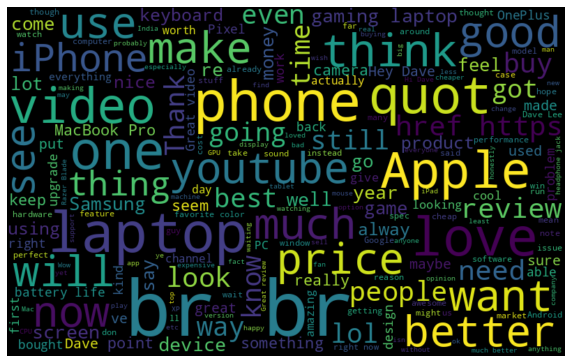

In [13]:
#Displaying the POSITIVE comments
all_words_posi = ' '.join([text for text in comment_textblob['comment'][comment_textblob.sentiment > 0]])
plot_words(all_words_posi)

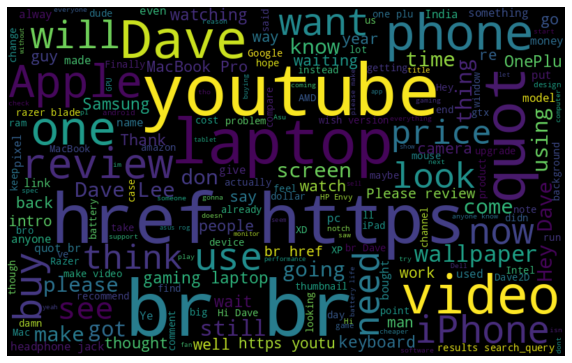

In [14]:
#Displaying the nuetral comments
all_words_nuet = ' '.join([text for text in comment_textblob['comment'][comment_textblob.sentiment == 0]])
plot_words(all_words_nuet)

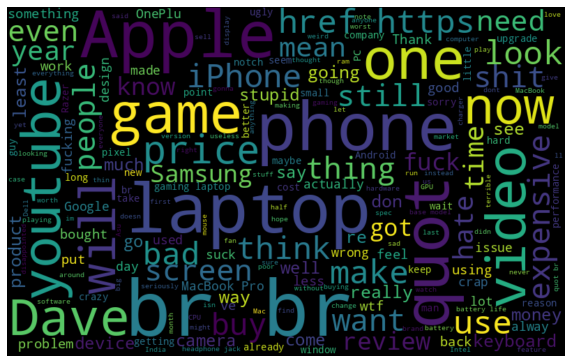

In [15]:
#Displaying the negative comments
all_words_neg = ' '.join([text for text in comment_textblob['comment'][comment_textblob.sentiment < 0]])
plot_words(all_words_neg)

In [16]:
# get the percantage of the positive comments
comment_textblob[comment_textblob['sentiment'] > 0].shape[0]/comment_textblob.shape[0]

# get the percantage of the nuetral confidence comments
comment_textblob[comment_textblob['sentiment'] == 0].shape[0]/comment_textblob.shape[0]

# get the percantage of the negative comments
comment_textblob[comment_textblob['sentiment'] < 0].shape[0]/comment_textblob.shape[0]



0.14828229741315682

<h2>2. StanfordCoreNLP </h2>
<h3>Calculating Sentiment polarity for each comment using StanfordCoreNLP</h3>

In [6]:
comment_stanfordnlp.head(500000)

,comment_id,comment,user_id,video_id
0,Ugxbw2WD-hchkWCrmt54AaABAg,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops,UCIF8DkwMeRUtWq9wSvMqBgw,pdUKug8XahU
1,Ugzy0AbwK8hjbnvV-5Z4AaABAg,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...,UC2JijchTVFQdbrhIT8njcMg,pdUKug8XahU
2,UgyY3jPwgpT1oGi7kvJ4AaABAg,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years,UC8sm6uSupqoaPPy4b_JD3IQ,pdUKug8XahU
3,UgxhZOz5QLpGsDOWiip4AaABAg,"RT dont interst me. Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance. I end up with triton 500 i7 107...",UCyXZpHjDZwnSMML1E8PtZyw,pdUKug8XahU
4,UgxX5Uwv-ue48davJCR4AaABAg,still in 2020?,UCsBUE8WUKtIdAyWPk5AzPJQ,pdUKug8XahU
...,...,...,...,...
499995,Ugxk8iwbkh6-HQzmpfJ4AaABAg,Favorite color - turquoise,UCWVsx1mYXPMsN6cqMoOM-gQ,5-lNLNfKr3s
499996,Ugw1JImaGl0OoWesz_F4AaABAg,Red,UCNkUZi7Y9Lr0_T1GZUkRZBA,5-lNLNfKr3s
499997,UgwqeA7zutFiGfjY2154AaABAg,Fav color: Razzmatazz,UC3fU8Xv2PkE5m5g_6G2uFcQ,5-lNLNfKr3s
499998,UgwaWSHWSFCMn1iNCVN4AaABAg,"All the content creators releasing reviews of the RTX 3060 today. May as well be reviewing solid gold unicorns that lay diamond encrusted eggs - try as you might, you wont find one!",UCaiEDF-CAvXr_ETbP3RklLQ,5-lNLNfKr3s


<h6>Here, we will delete dots from the paragraph that contains more than one sentence to avoid calculating the sentiment for each sentence separately

In [7]:
# remove dots  
comment_stanfordnlp['new_comment'] = comment_stanfordnlp['comment'].apply(lambda x : x.replace("."," "))

In [8]:
comment_stanfordnlp.head()

,comment_id,comment,user_id,video_id,new_comment
0,Ugxbw2WD-hchkWCrmt54AaABAg,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops,UCIF8DkwMeRUtWq9wSvMqBgw,pdUKug8XahU,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops
1,Ugzy0AbwK8hjbnvV-5Z4AaABAg,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...,UC2JijchTVFQdbrhIT8njcMg,pdUKug8XahU,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...
2,UgyY3jPwgpT1oGi7kvJ4AaABAg,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years,UC8sm6uSupqoaPPy4b_JD3IQ,pdUKug8XahU,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years
3,UgxhZOz5QLpGsDOWiip4AaABAg,"RT dont interst me. Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance. I end up with triton 500 i7 107...",UCyXZpHjDZwnSMML1E8PtZyw,pdUKug8XahU,"RT dont interst me Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance I end up with triton 500 i7 107..."
4,UgxX5Uwv-ue48davJCR4AaABAg,still in 2020?,UCsBUE8WUKtIdAyWPk5AzPJQ,pdUKug8XahU,still in 2020?


In [9]:
comment_stanfordnlp = comment_stanfordnlp[comment_stanfordnlp.new_comment != ""] 

In [18]:
def get_sentiment(row):
    
    """
    get_sentiment func 
    input : row from data frame 
    output : sentiment value for the comment in the row
    """
    
    nlp = StanfordCoreNLP('http://localhost:9000')
    res = nlp.annotate(
        row,
        properties={
            "annotators": "sentiment",
            "outputFormat": "json",
            "timeout": 100,
        },
    )   
    
    try:
        return res["sentences"][0]["sentimentValue"]
    except:
        return None  

In [ ]:
comment_stanfordnlp['sentiment'] = comment_stanfordnlp['new_comment'].progress_apply(lambda x: get_sentiment(x))

In [14]:
comment_stanfordnlp

,comment_id,comment,user_id,video_id,new_comment,sentiment
0,Ugxbw2WD-hchkWCrmt54AaABAg,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops,UCIF8DkwMeRUtWq9wSvMqBgw,pdUKug8XahU,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops,null
1,Ugzy0AbwK8hjbnvV-5Z4AaABAg,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...,UC2JijchTVFQdbrhIT8njcMg,pdUKug8XahU,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...,null
2,UgyY3jPwgpT1oGi7kvJ4AaABAg,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years,UC8sm6uSupqoaPPy4b_JD3IQ,pdUKug8XahU,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years,null
3,UgxhZOz5QLpGsDOWiip4AaABAg,"RT dont interst me. Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance. I end up with triton 500 i7 107...",UCyXZpHjDZwnSMML1E8PtZyw,pdUKug8XahU,"RT dont interst me Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance I end up with triton 500 i7 107...",null
4,UgxX5Uwv-ue48davJCR4AaABAg,still in 2020?,UCsBUE8WUKtIdAyWPk5AzPJQ,pdUKug8XahU,still in 2020?,null
...,...,...,...,...,...,...
1022902,UgzPiCJWb48TRFVAVph4AaABAg,Not good mac,UCmEjDFzKrzaMgwRsRkZrhfQ,CBZHavTlT6w,Not good mac,null
1022903,UgwXh165dAdbwK8UwPZ4AaABAg,free laptop?,UCstc-onxpGvhcQKTOe2IKtA,CBZHavTlT6w,free laptop?,null
1022904,UgyooyoctJPfG7cO54t4AaABAg,1st,UChYMJWdHa4j9KTKGb0sphHQ,CBZHavTlT6w,1st,null
1022905,UgzrcIgYM2aXZF2RR7J4AaABAg,1,UCmEjDFzKrzaMgwRsRkZrhfQ,CBZHavTlT6w,1,null


In [ ]:
# # save dataframe
comment_stanfordnlp.to_parquet('comment_data_df.parquet.gzip', compression='gzip')


In [ ]:
comment_stanfordnlp.to_parquet('/home/qamar/Desktop/comment_data_df.parquet.gzip', compression='gzip')


In [21]:
# compute sentiment value for each comment using StanfordCoreNLP
comment_stanfordnlp['sentiment'] = comment_stanfordnlp['new_comment'].apply(lambda x: get_sentiment(x)) 

IndexError: list index out of range

In [ ]:
comment_stanfordnlp.head()

In [ ]:
# convert sentiment column from object to int
comment_stanfordnlp = comment_stanfordnlp.infer_objects()

In [ ]:
comment_stanfordnlp["sentiment"] = pd.to_numeric(comment_stanfordnlp["sentiment"], downcast="float")

In [ ]:
# get the percantage of the high confidence comments
comment_stanfordnlp[comment_stanfordnlp['sentiment'] > 2].shape[0]/comment_stanfordnlp.shape[0]